<a href="https://colab.research.google.com/github/PosgradoMNA/Equipo_10/blob/main/Semana4_Actividad1__Equipo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 4 -Actividad 1**

Ciencia y Analitica de datos

Equipo 10:

Evelyn Aylin Rendon Medina - A01748750

Valeria Alejandra Ramirez Herrera - A01240716

Profesor: Jobish Vallikavungal

Fecha: 11/Octubre/2022

**PCA - Principal Component Analysis**

Es una técnica estadística, que nos ayuda a determinar la correlación de las variables para descartar aquellas no anadan valor al set de datos. Es importante para reducir la dimensionalidad de forma que sea más sencillo interpretar el modelo. Dicho esto el PCA, transforma las variables de un set de datos, que son renombradas a variables originales o componentes principales, donde su característica principal es que no están relacionadas entre sí.

**Concepto de componentes:** 

- **Dimensionalidad** En términos estadísticos se refiere a cuántos atributos tiene un data set. En este caso en específico estamos hablando de una reducción de dimensionalidad, lo que cual se refiere a simplificar los datos ya sea de manera numérica o visual para tener un mejor entendimiento de estos.
- **Variabilidad** Es la medida de la dispersión de los datos, también se puede encontrar como propagación o dispersión. Y describe cuánto llegan a variar los datos en un data set. Una de sus medidas es la varianza, que se describe más adelante.
- **Correlación** es aquella medida de estadística que dice hasta qué punto dos variables están relacionadas, es decir cuando están asociadas y una variable nos proporciona información de la otra. Al tiempo que se evalúa su tendencia en los datos.
- **Varianza.**  Es una forma de cuantificar la dispersión (refiriéndonos a la distribución) yacen los valores. Se calcula gracias a una fórmula definida.
- **Covarianza.** Es una forma de cuantificar la correlación (ya sea positiva o negativa, dependiendo el signo del resultado) entre dos variables. Se calcula gracias a una fórmula definida y si el resultado es igual a cero, dichas variables no están correlacionadas. Por otro lado, si entre dos variables hay una correlación positiva, al incremental una su valor, la otra también (signo positivo) y viceversa (con signo negativo).
Nota: Que dos variables no estén correlacionadas no significa que sean independientes, es decir que se descarta que una tenga influencia sobre la otra. Lo anterior se debe a que la correlación solamente nos indica la dependencia lineal.



## **Parte 1**

### Paso 1: 
Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

***Respuesta:*** Con base al análisis hecho con la técnica de PCA, llegamos al resultado de que serían 9 los principales componentes que representan la mayor parte de la variación. Debajo se encuentra el código usado desde la limpieza de los datos, normalización y el uso de PCA.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing #librería para normalizar
import scipy.stats as stats #librería para normalizar
import statistics as sts #desviación estántar
from statistics import mode #moda
from sklearn import preprocessing


In [ ]:
input = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
df=pd.read_csv(input, index_col = 0) #Aquí se encuentran los datos originales
df.index.name= None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
 df.isnull().values.any() #Se hace verificación si falta algún dato

True

In [ ]:
df.isnull().any() #En cuales columnas falta al menos 1 dato

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

**Limpieza de Datos - Llenar espacio vaciós en las columnas, dependiendo del tipo de dato (categórico o continuo), esto se vio en la actividad de la semana 3**
*   Columnas con datos categóricos: X2, X3, X4, X6, X7, X8, X9, X10, X11
*   Columnas con datos continuos: X1, X5, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23 




In [ ]:
clean_df = df.copy()
clean_df['X2'].fillna(value= clean_df['X2'].mode(), inplace = True)
clean_df['X3'].fillna(value= clean_df['X3'].mode(), inplace = True)
clean_df['X4'].fillna(value= clean_df['X4'].mode(), inplace = True)
clean_df['X6'].fillna(value= clean_df['X6'].mode(), inplace = True)
clean_df['X7'].fillna(value= clean_df['X7'].mode(), inplace = True)
clean_df['X8'].fillna(value= clean_df['X8'].mode(), inplace = True)
clean_df['X9'].fillna(value= clean_df['X9'].mode(), inplace = True)
clean_df['X10'].fillna(value= clean_df['X10'].mode(), inplace = True)
clean_df['X11'].fillna(value= clean_df['X11'].mode(), inplace = True)


clean_df['X1'].fillna(value= clean_df['X1'].mean(), inplace = True)
clean_df['X5'].fillna(value= clean_df['X5'].mean(), inplace = True)
clean_df['X12'].fillna(value= clean_df['X12'].mean(), inplace = True)
clean_df['X13'].fillna(value= clean_df['X13'].mean(), inplace = True)
clean_df['X14'].fillna(value= clean_df['X14'].mean(), inplace = True)
clean_df['X15'].fillna(value= clean_df['X15'].mean(), inplace = True)
clean_df['X16'].fillna(value= clean_df['X16'].mean(), inplace = True)
clean_df['X17'].fillna(value= clean_df['X17'].mean(), inplace = True)
clean_df['X18'].fillna(value= clean_df['X18'].mean(), inplace = True)
clean_df['X19'].fillna(value= clean_df['X19'].mean(), inplace = True)
clean_df['X20'].fillna(value= clean_df['X20'].mean(), inplace = True)
clean_df['X21'].fillna(value= clean_df['X21'].mean(), inplace = True)
clean_df['X22'].fillna(value= clean_df['X22'].mean(), inplace = True)
clean_df['X23'].fillna(value= clean_df['X23'].mean(), inplace = True)

#Se hace el reemplazo/limpieza de valores que no entran en el rango de los datos categóricos
#Columnas con datos categóricos: X2, X3, X4, X6, X7, X8, X9, X10, X11

clean_df=clean_df.replace({'X3':0},4) #Todo lo que tenga un 0 para la columna 3, se cambia a 4=others
clean_df=clean_df.replace({'X3':5},4) #Todo lo que tenga un 5 para la columna 3, se cambia a 4=others
clean_df=clean_df.replace({'X3':6},4) #Todo lo que tenga un 6 para la columna 3, se cambia a 4=others

clean_df=clean_df.replace({'X4':0},3) #Todo lo que tenga un 0 para la columna 4, se cambia a 3=others

clean_df=clean_df.replace({'X6':-2},-1) #Todo lo que tenga un -2 para la columna 6, se cambia a -1=pay duly
clean_df=clean_df.replace({'X6':0},-1) #Todo lo que tenga un 0 para la columna 6, se cambia a -1=pay duly
clean_df=clean_df.replace({'X7':-2},-1) #Todo lo que tenga un -2 para la columna 7, se cambia a -1=pay duly
clean_df=clean_df.replace({'X7':0},-1) #Todo lo que tenga un 0 para la columna 7, se cambia a -1=pay duly
clean_df=clean_df.replace({'X8':-2},-1) #Todo lo que tenga un -2 para la columna 8, se cambia a -1=pay duly
clean_df=clean_df.replace({'X8':0},-1) #Todo lo que tenga un 0 para la columna 8, se cambia a -1=pay duly
clean_df=clean_df.replace({'X9':-2},-1) #Todo lo que tenga un -2 para la columna 9, se cambia a -1=pay duly
clean_df=clean_df.replace({'X9':0},-1) #Todo lo que tenga un 0 para la columna 9, se cambia a -1=pay duly
clean_df=clean_df.replace({'X10':-2},-1) #Todo lo que tenga un -2 para la columna 10, se cambia a -1=pay duly
clean_df=clean_df.replace({'X10':0},-1) #Todo lo que tenga un 0 para la columna 10, se cambia a -1=pay duly
clean_df=clean_df.replace({'X10':-2},-1) #Todo lo que tenga un -2 para la columna 11, se cambia a -1=pay duly
clean_df=clean_df.replace({'X10':0},-1) #Todo lo que tenga un 0 para la columna 11, se cambia a -1=pay duly

clean_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,-1.0,-1.0,-1.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
clean_df.isnull().values.any() #Se comprueba que se hizo la limpieza y no falta ningún dato. LIMPIEZA COMPLETA

True

**Normalización de datos con la función de preprocessing a partir de los datos limpios**

In [ ]:
ndf = clean_df.copy()
ndf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
#Quitamos variables categóricas: X2, X3, X4, X6, X7, X8, X9, X10, X11. Ya que PCA no es capaz de trabajar con este tipo de datos, sólo numéricos.
ndf.drop(['X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'], 
         axis = 1, 
         inplace = True
        )
ndf

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
#Para la normalización también está esta opción de fórmula en base a los Mínimos y Máximos - Se deja como referencia

#normdf=((ndf-ndf.min())/(ndf.max()-ndf.min()))
#normdf.round(4)

In [ ]:
import seaborn as sns

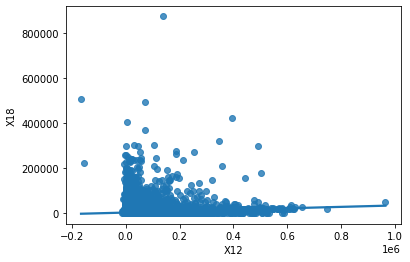

In [ ]:
p = sns.regplot(data = ndf,  
                x = ndf.X12, 
                y = ndf.X18
               ) 
p

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(ndf.dropna(axis=0)))

PCA()

In [ ]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3100,1.0223,0.9617,0.9400,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2027,0.1593,0.1525
Proportion of variance,0.4228,0.1226,0.0747,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


####Paso 2: 
Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

PC1: valor máximo del primer componente principal que corresponde a X15 y representa el monto de la cuenta en Jul 2005 con peso de 0.391552. Lo cual significa que PC1 mide el estatus de la deuda.

PC2: valor máximo del segundo componente principal que corresponde a X19 y representa el monto de los pagos previos en May 2005 con peso de 0.408284. Lo cual significa que PC2 mide el estatus de pagos pasados de la deuda.

PC3: valor máximo del tercer componente principal que corresponde a X5 y representa la edad, con peso (en este caso positivo) de 0.869558 (-0.869558). Lo cual significa que PC4 analiza la edad.

PC4: valor máximo del cuarto componente principal que corresponde a X22 y representa el monto de los pagos previos en Ago 2005 con peso de 0.609136. Lo cual significa que PC4 mide el estatus de pagos pasados.

PC5: valor máximo del quinto componente principal que corresponde a X23 y representa el monto de los pagos previos en Sep 2005 con peso de 0.657420. Lo cual significa que PC5 mide el estatus de pagos pasados.

PC6: valor máximo del sexto componente principal que corresponde a X22 y representa el monto de los pagos previos en Ago 2005 con peso de 0.603400. Lo cual significa que PC6 mide el estatus de pagos pasados.

PC7: valor máximo del séptimo componente principal que corresponde a X20 y representa el monto de los pagos previos en Jun 2005 con peso de 0.785218. Lo cual significa que PC7 mide el estatus de pagos pasados.

PC8: valor máximo del octavo componente principal que corresponde a X18 y representa el monto de los pagos previos en Abr 2005 con peso de 0.749029. Lo cual significa que PC8 mide el estatus de pagos pasados.

In [ ]:
pcsSummary_df.iloc[2,7] #necesitamos 8 componentes principales para el 90% de variabilidad

0.9191163617737631

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=ndf.columns
                                )
pcsComponents_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
X1,0.165466,0.300840,-0.378685,-0.200217,0.034722,-0.078275,0.111060,-0.048351
X5,0.032742,0.071966,-0.869558,0.338508,-0.039014,0.071222,-0.078665,0.028216
X12,0.372429,-0.190839,-0.034308,-0.063997,0.041154,-0.044069,0.008156,0.009438
X13,0.383249,-0.174640,-0.001881,0.007366,0.083060,-0.029011,-0.032348,-0.135672
X14,0.388259,-0.126916,0.034704,0.060455,0.114161,0.098801,-0.121322,0.092855
X15,0.391552,-0.120428,0.034018,0.074805,0.028592,0.014391,0.126411,0.039206
X16,0.388497,-0.105966,0.033847,0.039665,-0.106935,-0.099031,-0.007584,0.049718
X17,0.380661,-0.094222,0.018529,-0.070282,-0.164903,0.069737,0.007982,0.000058
X18,0.135171,0.383270,0.173506,0.361335,0.226156,0.039905,-0.201113,-0.749029
X19,0.116794,0.408284,0.200849,0.346307,0.150531,0.407273,-0.279619,0.577950


In [ ]:
pcsComponents_df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.229939,0.122901,-0.051108,0.004911,0.000958,0.002591,-0.007413,0.002139,0.024954,0.010582,0.002626,-0.002318,0.000304,0.001173
std,0.141364,0.246285,0.272232,0.277303,0.277348,0.277337,0.277243,0.277341,0.276138,0.277133,0.277337,0.277340,0.277350,0.277347
min,0.032742,-0.190839,-0.869558,-0.609136,-0.579459,-0.499318,-0.462043,-0.749029,-0.821874,-0.488859,-0.523297,-0.489005,-0.427269,-0.527827
25%,0.116826,-0.116812,-0.046532,-0.088211,-0.150411,-0.093842,-0.110658,-0.036249,0.012032,-0.088536,-0.076158,-0.069421,-0.084498,-0.079227
50%,0.150318,0.186403,0.026188,0.023516,0.031657,-0.007310,0.000199,0.033711,0.022819,0.020871,0.017578,-0.000075,-0.008795,0.002209
75%,0.382602,0.343015,0.055381,0.202685,0.106386,0.070851,0.022727,0.075518,0.138999,0.123757,0.062897,0.100402,0.035514,0.064474
max,0.391552,0.408284,0.200849,0.361335,0.657420,0.603400,0.785218,0.577950,0.330705,0.566738,0.513623,0.495979,0.718333,0.645429


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

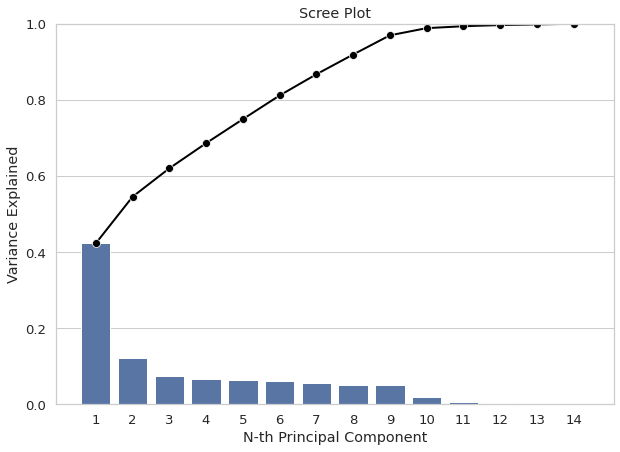

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

####Paso 3: 
Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

En base a la siguiente gráfica, podemos identificar que donde hay más valores atípicos o outliers son en PC3, PC6, PC10, PC11, PC13 y PC14. Y los que no muestran algo así son PC1 y PC2.

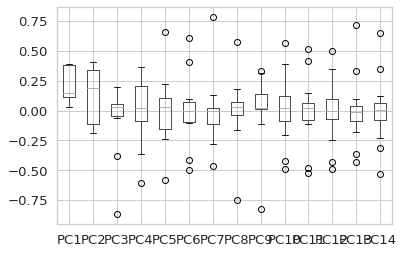

In [ ]:
pcsComponents_df.boxplot()

## **Parte 2**

¿Cuál es el número de componentes mínimo y por qué?

El número mínimo de componentes principales son 8, ya que tomamos en cuenta el 90% de variación dado el análsis que se realizó de PCA.


¿Cuál es la variación de los datos que representan esos componentes?

Los componentes principales seleccionados representan el 90% de variación en cuanto al set de datos completo.

¿Cuál es la pérdida de información después de realizar PCA?

La pérdida de información sería de al rededor del 10%, basándonos en los resultados obtenidos del análisis del PCA más la eliminación que representan las variables categóricas que no podían ser analizadas por esta técnica.


De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

En base al análsis, los componentes principales que más tienen peso se centraban en las variables correspondientes al monto de la deuda y los pago previos. Con puso relativamente importante para la edad, y sin mucha importancia el monto de crédito nunca salió para ser analizado. Lo que nos lleva a concluir que no afecta el crédito otorgado, sino el como se maneja la deuda y el pago.


¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

**PCA** puede ser útil para reducir la dimensionalidad de tu data set y por ende la complejidad del mismo, haciendo más fácil modelar e interpretar los resultados. Se recomienda también cuando tiene una gran cantidad de variables de forma que determinar su correlación nos puede ayudar a descartar a las que no aportan información valiosa.

**Beneficio de realizar un PCA para Machine learning.** Las técnicas que giran en torno al aprendizaje automático suelen implicar una gran cantidad de datos, podemos, por ejemplo, seguir añadiendo variables a un modelo para intentar que sea más preciso, pero eso requerirá más recursos y puede que ese volumen tan grande de variables no esté aportando información valiosa de todas formas, por lo que analizar cuáles de ellas realmente aportan valor a la predicción es fundamental. Justamente con ello se beneficia el aprendizaje automático de la técnica de PCA, eliminando las variables que tengan menor importancia del conjunto más relevante, además que posterior a su implementación, las variables que permanezcan (componentes principales) serán independientes.

#**Referencias**

Géron, Aurélien (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition. O’Reilly.

Salinas, J. (n.d.). Capítulo 3 Análisis de Componentes Principales. Retrieved from Bookdown: https://bookdown.org/jsalinas/tecnicas_multivariadas/acp.html

NA., (2018, octubre), “Comprende Principal Component Analysis”, recuperado el 07 octubre 2022 de https://www.aprendemachinelearning.com/comprende-principal-component-analysis/

Avila Camacho J. (2020, abril), “Análisis del Componente Principal PCA con Python”, recuperado el 07 octubre 2022 de https://www.youtube.com/watch?v=oAsZfT-paG0

Benites, L. (2022, Marzo 31). Dimensionalidad y datos de alta dimensión: definición, ejemplos, maldición de. Retrieved from Statologos: https://statologos.com/dimensionalidad/

Benites, L. (2022, Mayo 30). Variabilidad en Estadística: Definición, Ejemplos. Retrieved from Statologos: https://statologos.com/variabilidad/

Ferrero, R. (2020, Julio). ¿QUÉ ES LA CORRELACIÓN ESTADÍSTICA Y CÓMO INTERPRETARLA? Retrieved from Máxima Formación: ¿QUÉ ES LA CORRELACIÓN ESTADÍSTICA Y CÓMO INTERPRETARLA?: https://www.maximaformacion.es/blog-dat/que-es-la-correlacion-estadistica-y-como-interpretarla/

Sociedad de anestresiología de Chile. (2014). Muestras, variabilidad y error. Retrieved from Revista chilena de anestesia: https://revistachilenadeanestesia.cl/muestras-variabilidad-y-error/